In [1]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sn
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split

In [3]:
import yfinance as yf
data = yf.download('TSLA', start = '2023-01-01', end = '2025-01-01')
data.head()

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,
2023-01-03,108.099998,118.800003,104.639999,118.470001,231402800
2023-01-04,113.639999,114.589996,107.519997,109.110001,180389000
2023-01-05,110.339996,111.750000,107.160004,110.510002,157986300
2023-01-06,113.059998,114.389999,101.809998,103.000000,220911100
2023-01-09,119.769997,123.519997,117.110001,118.959999,190284000


In [4]:
data.columns = [col[1] if col[0] == '^GSPC' else col[0] for col in data.columns]
data.reset_index(inplace = True)
data.head()

,Date,Close,High,Low,Open,Volume
0,2023-01-03,108.099998,118.800003,104.639999,118.470001,231402800
1,2023-01-04,113.639999,114.589996,107.519997,109.110001,180389000
2,2023-01-05,110.339996,111.750000,107.160004,110.510002,157986300
3,2023-01-06,113.059998,114.389999,101.809998,103.000000,220911100
4,2023-01-09,119.769997,123.519997,117.110001,118.959999,190284000


In [5]:
df = data[["Close"]].copy()
df.describe()

,Close
count,502.000000
mean,224.071275
std,58.662670
min,108.099998
25%,183.250000
50%,216.055000
75%,251.360001
max,479.859985


In [6]:
print("Now, find 'd' the no of differencing needed to make the price series stationary.")

Now, find 'd' the no of differencing needed to make the price series stationary.


In [7]:
from statsmodels.tsa.stattools import adfuller

results = adfuller(df.Close.dropna())
print(f"ADF Statistics {results[0]}")

ADF Statistics -0.8124566820962108


In [8]:
print(f"p-value {results[1]}")

p-value 0.8154355988841779


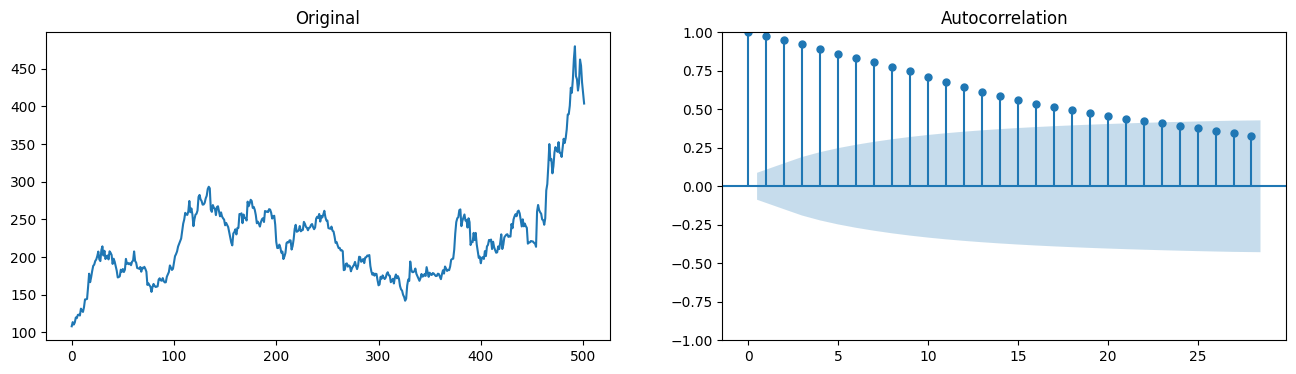

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (16, 4))

ax1.plot(df.Close)
ax1.set_title("Original")
plot_acf(df.Close, ax=ax2);

In [11]:
from pmdarima.arima.utils import ndiffs

In [13]:
print(f" Number of differncing: {ndiffs(df.Close, test = "adf")}")

 Number of differncing: 1


In [14]:
print(" pmdarima is an arima package used to get the number of differencing automatically.\n Therefore: d = 1 ")

 pmdarima is an arima package used to get the number of differencing automatically.
 Therefore: d = 1 


In [32]:
optimal = pmdarima.auto_arima(df.Close, stepwise = True, trace = True, seasonal = False, max_P = 5, max_d = 3, max_q = 5)
p, d, q = model.order 


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=3580.257, Time=0.81 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3582.760, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3583.807, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3583.793, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3583.110, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=3587.310, Time=0.31 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=3587.721, Time=0.34 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=3583.844, Time=1.04 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=3584.638, Time=0.93 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3585.787, Time=0.11 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=3588.603, Time=0.53 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=3588.760, Time=0.43 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=3593.115, Time=0.57 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=inf, Time=0.56 sec

Best model:  ARIMA(2,1,2)(0,0,0)[0] i

In [33]:
import pmdarima as pm
from pmdarima.model_selection import train_test_split
train, test = train_test_split(df.Close, test_size = 52)
model = pm.auto_arima(train, p = 2, d = 1, q = 2, stepwise = True)
result = model.fit(df.Close)

In [34]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  502
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -1790.555
Date:                Wed, 19 Nov 2025   AIC                           3583.110
Time:                        01:04:49   BIC                           3587.327
Sample:                             0   HQIC                          3584.765
                                - 502                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2        74.4474      2.716     27.412      0.000      69.124      79.770
===================================================================================
Ljung-Box (L1) (Q):                   0.95   Jarque-Bera (JB):               334.26
Prob(Q):                              0.33   Prob(JB):                         0.00
Heteroskedasticity (H):               2.50   Skew:                             0.32
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.95
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

(array([0.00053901, 0.00377304, 0.04595028, 0.01576593, 0.00121276,
        0.0002695 , 0.        , 0.        , 0.        , 0.00013475]),
 array([-39.72998047, -24.94698257, -10.16398468,   4.61901321,
         19.40201111,  34.185009  ,  48.9680069 ,  63.75100479,
         78.53400269,  93.31700058, 108.09999847]),
 <BarContainer object of 10 artists>)

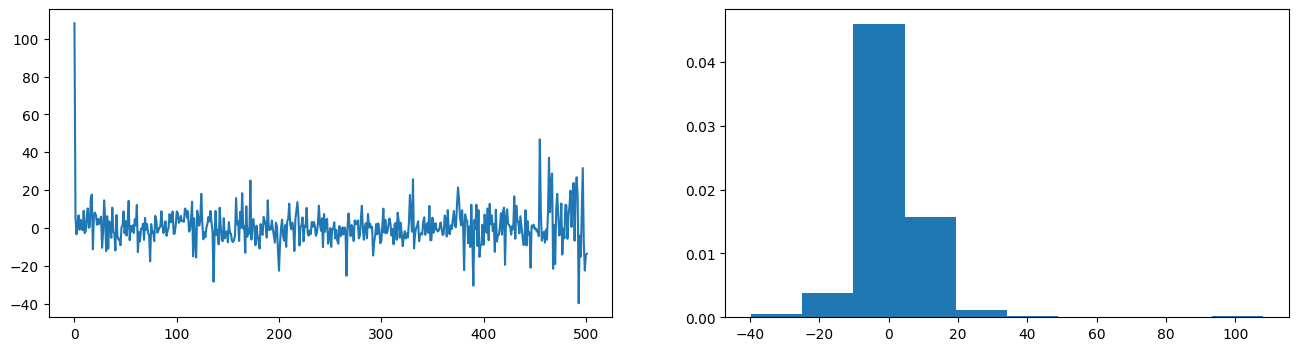

In [35]:
residuals = pd.DataFrame(result.resid())

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (16, 4))

ax1.plot(residuals)
ax2.hist(residuals, density = True)

In [36]:
pred = model.predict(n_periods = len(test))
mse = mean_squared_error(test, pred)
r2 = r2_score(test, pred)
print(f"MSE:{mse}, R-squared:{r2}")

MSE:9534.77080310277, R-squared:-0.6932434876294273
